In [53]:
import matplotlib.pyplot as plt
from endfiresim.wave import CWaveModelPlanar
import numpy as np

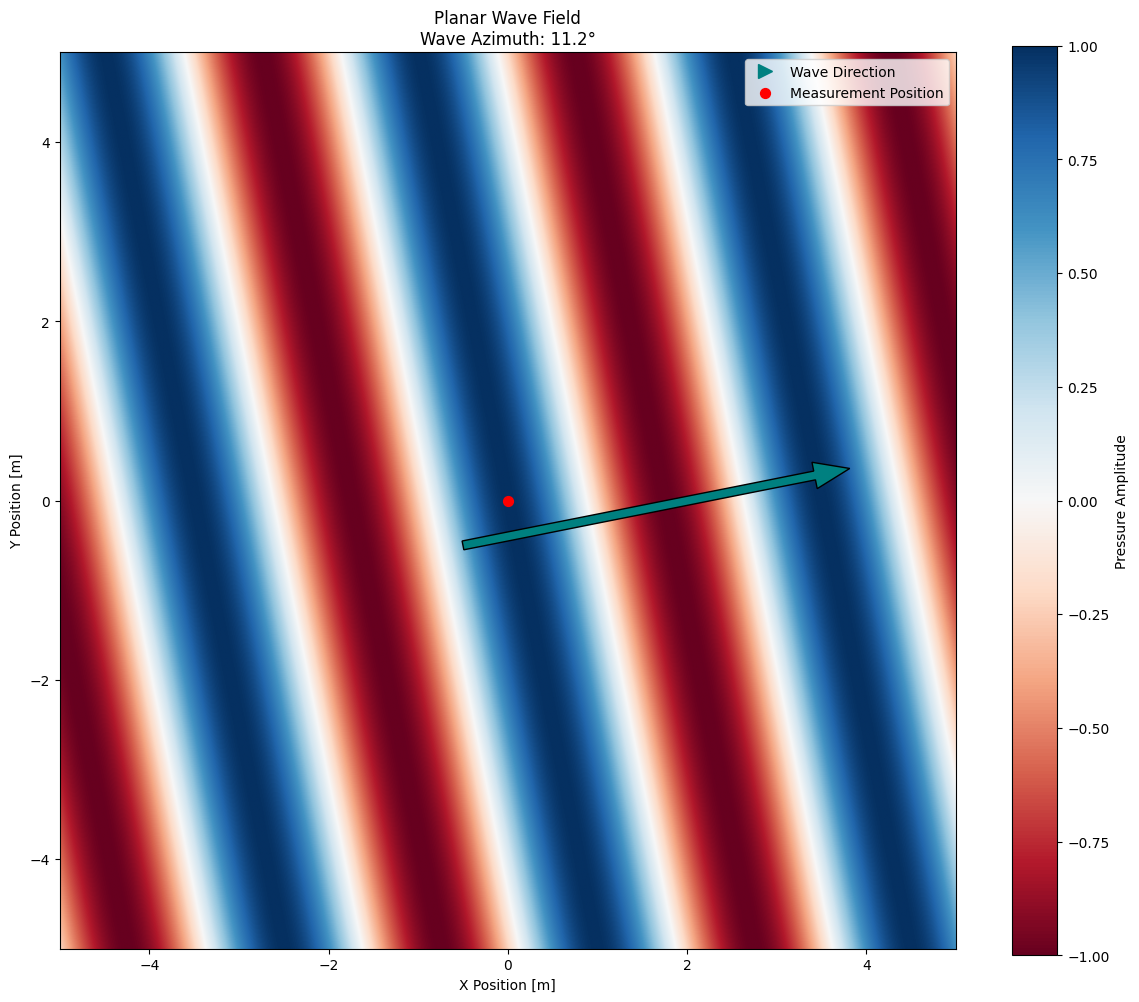

In [54]:
# Basic properties
freq = 100
azim_wave = np.pi/16
fs = 48000
dur = 0.2
ts = np.arange(0, dur, 1/fs)
meas_pos = (0, 0, 0)

# Wave model
pw = CWaveModelPlanar(freq, azim=azim_wave)

# Entire wave as heatmap
x = np.linspace(-5, 5, 1000)
x, y = np.meshgrid(x, x)
z = np.zeros_like(x)
p_field = pw.p(0, (x, y, z)) # pressure field at t = 0
p_point = pw.p(ts, meas_pos)  # pressure at point and over time frame t

# Plot wave field
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(np.real(p_field), 
               extent=[x.min(), x.max(), y.min(), y.max()],
               cmap='RdBu', 
               origin='lower')

# Direction arrow for wave
arrow_length = 0.8 * min(x.max(), y.max())
ax.arrow(0.1*x.min(), 0.1*y.min(), 
         arrow_length*np.cos(azim_wave), arrow_length*np.sin(azim_wave),
         width=0.1, head_width=0.3, head_length=0.4,
         fc='teal', ec='k')

# Denote ideal measurement position
scatter = ax.scatter(meas_pos[0], meas_pos[1], s=50, color='r', label="Measurement Position")

# Add labels and decorations
ax.set_xlabel('X Position [m]')
ax.set_ylabel('Y Position [m]')
ax.set_title(f'Planar Wave Field\n'
             f'Wave Azimuth: {np.rad2deg(azim_wave):.1f}°')
plt.colorbar(im, label='Pressure Amplitude')
ax.set_aspect('equal')

# Add legend
wave_arrow = plt.Line2D([0], [0], color='teal', marker='>', linestyle='None',
                        markersize=10, label='Wave Direction')
ax.legend(handles=[wave_arrow, scatter])

plt.tight_layout()
plt.show()

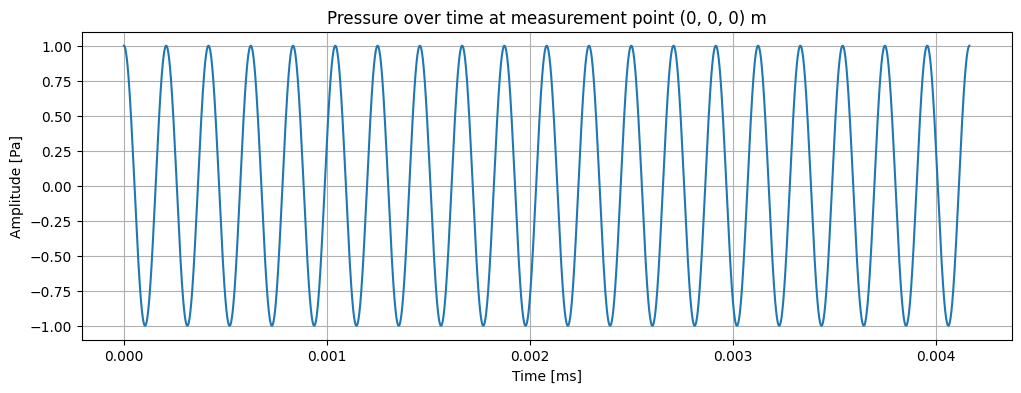

In [55]:
# Plot time signal at measurement position
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(ts/fs*1000, np.real(p_point))
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Amplitude [Pa]")
ax.set_title(f"Pressure over time at measurement point {meas_pos} m")
ax.grid()